<a href="https://colab.research.google.com/github/crisouzajr/Estatistica-em-Python/blob/CHI-SQUARE/CHI_SQUARE_Teste.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Estatística Preditiva - Teste de Hipótese (CHI SQUARE TESTE)

# INTRODUÇÃO

## O teste é aplicado quando você tem duas variáveis **​​categóricas** de uma única população. É usado para determinar se existe uma associação significativa entre as duas variáveis.

As variáveis ​​podem ser classificadas como categóricas (também conhecidas como qualitativas) ou quantitativas (também conhecidas como numéricas).

* Categórica: As variáveis ​​categóricas assumem valores que são nomes ou 
rótulos. A cor de uma bola (por exemplo, vermelho, verde, azul) ou a raça de um cão (por exemplo, collie, pastor, terrier) seriam exemplos de variáveis ​​categóricas.

* Quantitativa: As variáveis ​​quantitativas são numéricas. Eles representam uma quantidade mensurável. Por exemplo, quando falamos da população de uma cidade, estamos falando do número de pessoas na cidade - um atributo mensurável da cidade. Portanto, a população seria uma variável quantitativa.

Mais detalhes sobre o desenvolvimento teórico do teste clique [aqui.](https://www.interactive-maths.com/blog/breaking-down-chi-squared-tests)



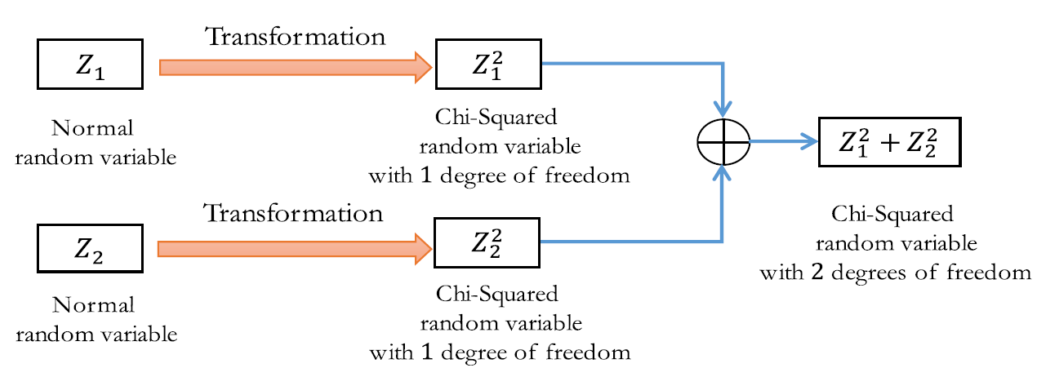

## DESENVOLVIMENTO

Podemos imaginar em uma pesquisa, onde queremos a partir de um grupo de indivíduos e classificá-los de acordo com o gênero (masculino ou feminino) e suas preferências por determinada escolha de atributo. É possível usar um teste de qui-quadrado para independência para determinar se o gênero está relacionado à preferência da relação de escolhas possíveis.

* No exemplo prático iremos determinar qual a preferência por realizar compras (bens em geral) em um grupo de indivíduos que são classificados de acordo com o seu gênero apenas.


In [1]:
# Carregando as bibliotecas necessárias.

import pandas as pd
from scipy import stats
from scipy.stats import chi2
from statsmodels.stats import weightstats as stests

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# Carregando a base de dados.

df_chi = pd.read_csv('chi-test.csv', delimiter=';')
df_chi

,Gender,Like Shopping?
0,Male,No
1,Female,Yes
2,Male,Yes
3,Female,Yes
4,Female,Yes
5,Male,Yes
6,Male,No
7,Female,No
8,Female,No


In [3]:
# Verificando no dataset a relação de escolha por gênero.

contingency_table=pd.crosstab(df_chi["Gender"],df_chi["Like Shopping?"])
print('Contingency Table :\n\n',contingency_table)

Contingency Table :

 Like Shopping?  No  Yes
Gender                 
Female           2    3
Male             2    2


In [4]:
# Avaliando os valores e resultados.

Observed_Values = contingency_table.values 
print(" Valores Observados :\n\n",Observed_Values)

b=stats.chi2_contingency(contingency_table)
Expected_Values = b[3]
print("\n Valores Esperados :\n\n",Expected_Values)

no_of_rows=len(contingency_table.iloc[0:2,0])
no_of_columns=len(contingency_table.iloc[0,0:2])
ddof=(no_of_rows-1)*(no_of_columns-1) 
print("\n Grau de Liberdade:\n\n",ddof)

 Valores Observados :

 [[2 3]
 [2 2]]

 Valores Esperados :

 [[2.22222222 2.77777778]
 [1.77777778 2.22222222]]

 Grau de Liberdade:

 1


In [5]:
# Determinando o grau de liberdade para a amostra.  
alpha = 0.05

# Realizando os cálculos estatísticos amostrais.
chi_square=sum([(o-e)**2./e for o,e in zip(Observed_Values,Expected_Values)])
chi_square_statistic=chi_square[0]+chi_square[1]
critical_value=chi2.ppf(q=1-alpha,df=ddof)

In [6]:
# Verificando os resultados dos parâmentros estatísticos da amostra amostra.
print('RESULTADOS ESTATÍSTICOS \n')

p_value=1-chi2.cdf(x=chi_square_statistic,df=ddof)
print('p-value:',p_value)
print('Nível de significância: ',alpha)
print('Grau de Liberdade: ',ddof)
print('Qui-Quadrado:',chi_square_statistic)
print('Valor Crítico:',critical_value)

RESULTADOS ESTATÍSTICOS 

p-value: 0.7641771556220945
Nível de significância:  0.05
Grau de Liberdade:  1
Qui-Quadrado: 0.09000000000000008
Valor Crítico: 3.841458820694124


In [7]:
# Utilizando um looping for para determinar a aceitação ou não das Hipóteses.


if chi_square_statistic>=critical_value:
    print("QUI-QUADRADO: Rejeitar H0, existe uma relação entre as 2 variáveis ​​categóricas")
else:
    print("QUI-QUADRADO: Rejeitar H0, não existe uma relação entre as 2 variáveis ​​categóricas")
    
if p_value<=alpha:
    print("p_value: Rejeitar H0, existe uma relação entre as 2 variáveis ​​categóricas")
else:
    print("p_value: Rejeitar H0, não existe uma relação entre as 2 variáveis ​​categóricas")

QUI-QUADRADO: Rejeitar H0, não existe uma relação entre as 2 variáveis ​​categóricas
p_value: Rejeitar H0, não existe uma relação entre as 2 variáveis ​​categóricas
